# Ejercicio1 - Busqueda de Alojamiento en Airbnb (Jupyter).

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [10]:
import pandas as pd
df_airbnb = pd.read_csv("/content/airbnb.csv")

In [11]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Ejercicios

### 1. Realizar Análisis Exploratorio de los datos

Sobre este apartado deberá explorar los datos como se vio en clase .. aplicar métodos shape, columns, etc

In [16]:
#iniciamos con las columnas
df_airbnb.columns

Index(['room_id', 'host_id', 'room_type', 'neighborhood', 'reviews',
       'overall_satisfaction', 'accommodates', 'bedrooms', 'price'],
      dtype='object')

In [17]:
#Segundo visualizamos la data de una de las columnas
df_airbnb['reviews'].head(10)

,reviews
0,8
1,0
2,63
3,225
4,132
5,14
6,25
7,28
8,28
9,24


In [20]:
#selección de multiples columnas
columns_select = ['reviews','accommodates']
df_subset = df_airbnb[columns_select]
df_subset.head()

,reviews,accommodates
0,8,2
1,0,2
2,63,3
3,225,4
4,132,4


### 2. Realizar Filtrados a Datos

- Realizar filtrados, según sea el caso.


Nota:
Para obtener el top de un conjunto de datos debemos aplicar un head(n) además de ordenar los datos

#### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [23]:
# Filtramos el dataframe para cumplir con las condiciones
alicia_df = df_airbnb[
    (df_airbnb['reviews'] > 10) &
    (df_airbnb['overall_satisfaction'] > 4) &
    (df_airbnb['bedrooms'] >= 2)]

# Ordenamos por 'satisfacciónn' y 'reseñas'
alicia_df = alicia_df.sort_values(by=['overall_satisfaction', 'reviews'], ascending=[False, False])

# Mostramos las 3 mejores opciones
display(alicia_df.head(3))

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
120,176153,842219,Entire home/apt,Misericórdia,438,5.0,4,2.0,102.0
16,44043,192830,Entire home/apt,Santa Maria Maior,316,5.0,7,3.0,80.0
140,202150,989393,Entire home/apt,Santa Maria Maior,274,5.0,4,2.0,62.0


#### Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [28]:
#Primero instalamos el paquete para poder guardar en archivos .xls
!pip install xlwt

In [37]:
# Filtramos para obtener las propiedades de Roberto y Clara
roberto_clara_df = df_airbnb[df_airbnb['room_id'].isin([97503, 90387])]

# Guardamos el dataframe como un archivo de Excel en formato .xlsx.

roberto_clara_df.to_excel("roberto.xlsx")

In [38]:
roberto_clara_df.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
41,90387,490050,Private room,Santo António,204,5.0,2,1.0,46.0
48,97503,515924,Private room,Santo António,39,4.0,2,1.0,26.0



#### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [40]:
# Filtramos para Diana
diana_df = df_airbnb[
    (df_airbnb['price'] <= 50)]

# Ordenamos por tipo de habitación y puntuación
diana_df = diana_df.sort_values(by=['room_type', 'overall_satisfaction'], ascending=[True, False])


# Mostramos las 5 opciones más baratas
display(diana_df.head(5))

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
7,29891,128792,Entire home/apt,Misericórdia,28,5.0,3,1.0,49.0
55,116672,211826,Entire home/apt,São Vicente,273,5.0,2,1.0,46.0
138,198480,640147,Entire home/apt,Lumiar,6,5.0,2,1.0,48.0
255,348764,1767259,Entire home/apt,Misericórdia,223,5.0,2,1.0,46.0
370,487394,2412046,Entire home/apt,Santa Maria Maior,219,5.0,2,1.0,46.0


### 3. Realizar Agrupamientos de Datos


- Según su criterio, aplicar 2 tipos de agrupamientos a los datos brindados.
- **Opcional**, averiguar como realizar el gráfico de los 2 agrupamientos de los datos realizados. Se podría emplear librerias como mathplot y searbon ... ayudarse de, chatgtp, etc


Precio promedio por barrio:


,price
neighborhood,
Benfica,270.816901
Carnide,229.829787
São Domingos de Benfica,203.152174
Parque das Nações,110.456000
Campo de Ourique,102.275862


/tmp/ipython-input-41-3163044803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=precio_por_barrio.head(10).index, y=precio_por_barrio.head(10).values, palette='viridis')


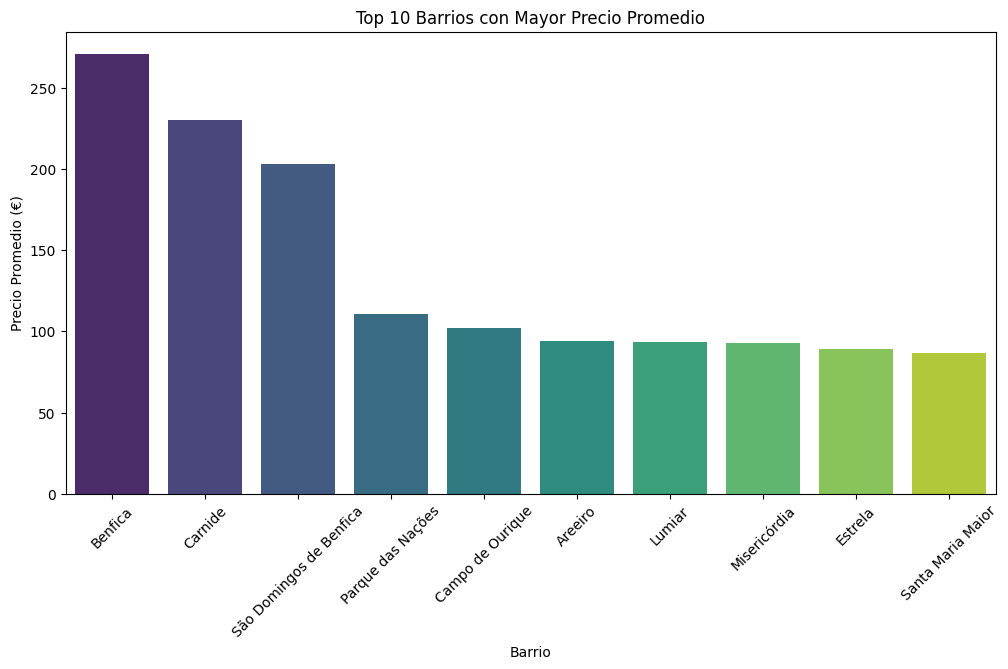



Número de propiedades por tipo de habitación:


,count
room_type,
Entire home/apt,9764
Private room,3297
Shared room,171


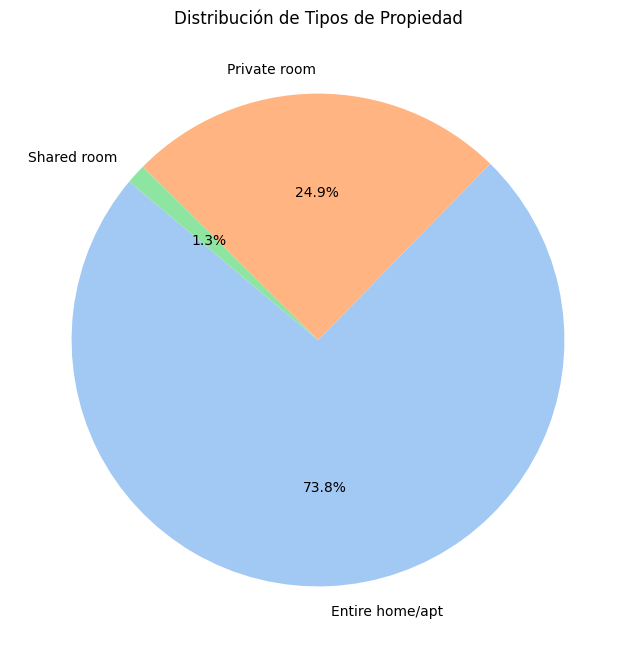

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupación 1: Precio promedio por barrio
precio_por_barrio = df_airbnb.groupby('neighborhood')['price'].mean().sort_values(ascending=False)

print("Precio promedio por barrio:")
display(precio_por_barrio.head())

# Gráfico 1: Precio promedio por barrio (Top 10) con graficos de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=precio_por_barrio.head(10).index, y=precio_por_barrio.head(10).values, palette='viridis')
plt.title('Top 10 Barrios con Mayor Precio Promedio')
plt.xlabel('Barrio')
plt.ylabel('Precio Promedio (€)')
plt.xticks(rotation=45)
plt.show()

print("\n" + "="*50 + "\n")

# Agrupación 2: Número de propiedades por tipo de habitación
propiedades_por_tipo = df_airbnb['room_type'].value_counts()

print("Número de propiedades por tipo de habitación:")
display(propiedades_por_tipo)

# Gráfico 2: Número de propiedades por tipo de habitación con un grafico circular que nos indicque en porcentajes
plt.figure(figsize=(8, 8))
plt.pie(propiedades_por_tipo, labels=propiedades_por_tipo.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribución de Tipos de Propiedad')
plt.ylabel('') # Ocultar el label 'room_type' del eje y
plt.show()